# Intro to Data

In [17]:
import pandas as pd
import seaborn as sns
movies = pd.read_csv("fandango_score_comparison.csv")
movies.head()


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [28]:
movies.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes', 'Fandango_Difference', 'fm_diff'],
      dtype='object')

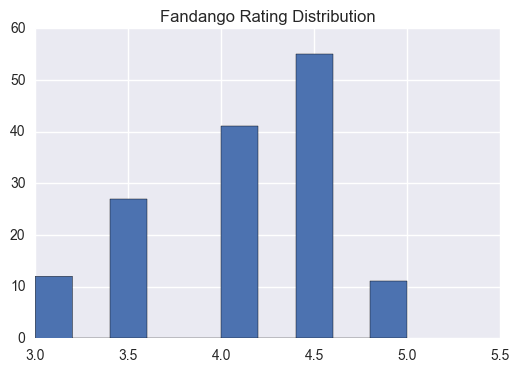

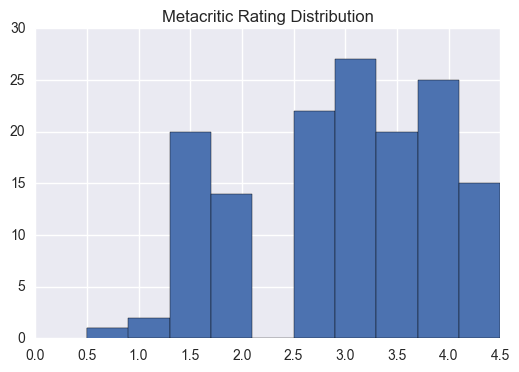

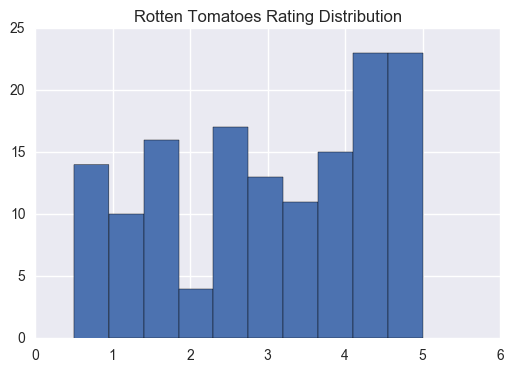

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(movies["Fandango_Stars"])
plt.title("Fandango Rating Distribution")
plt.show()

plt.hist(movies["Metacritic_norm_round"])
plt.title("Metacritic Rating Distribution")
plt.show()

plt.hist(movies["RT_norm_round"])
plt.title("Rotten Tomatoes Rating Distribution")
plt.show()

# Fandango vs Metacritic Scores vs Rotten Tomatoes
There are no scores below a 3.0 in the Fandango reviews. The Fandango reviews also tend to center around 4.5 and 4.0, whereas the Metacritic reviews seem to center around 3.0 and 3.5.. Rotten Tomatoes has a more wide spread from 0.5 to 5.

In [35]:
fan_mean = movies["Fandango_Stars"].mean()
meta_mean = movies["Metacritic_norm_round"].mean()
rt_mean = movies["RT_norm_round"].mean()

fan_median = movies["Fandango_Stars"].median()
meta_median = movies["Metacritic_norm_round"].median()
rt_median = movies["RT_norm_round"].median()

fan_std = movies["Fandango_Stars"].std()
meta_std = movies["Metacritic_norm_round"].std()
rt_std = movies["RT_norm_round"].std()

print("Fandango, mean, median, standard deviation:", fan_mean, fan_median, fan_std)
print("Metacritic, mean, median, standard deviation:", meta_mean, meta_median, meta_std)
print("RT mean, median, standard deviation:", rt_mean, rt_median, rt_std)

Fandango, mean, median, standard deviation: 4.089041095890411 4.0 0.5403859779787333
Metacritic, mean, median, standard deviation: 2.9726027397260273 3.0 0.9909605613743364
RT mean, median, standard deviation: 3.065068493150685 3.0 1.5145998659372135


# Fandango vs Metacritic vs RT Methodology
Fandango appears to inflate ratings and isn't transparent about how it calculates and aggregates ratings. Metacritic publishes each individual critic rating, and is transparent about how they aggregate them to get a final rating. Rotten Tomatoes is more user centric rating system hence the wide spread of ratings in its histogram.

# Fandango vs Metacritic number differences
The median metacritic score appears higher than the mean metacritic score because a few very low reviews "drag down" the median. The median fandango score is lower than the mean fandango score because a few very high ratings "drag up" the mean.
Fandango ratings appear clustered between 3 and 5, and have a much narrower random than Metacritic reviews, which go from 0 to 5.
Fandango ratings in general appear to be higher than metacritic ratings.
RT ratings follow a similar values of mean and median to Metacritic Ratings.
These may be due to movie studio influence on Fandango ratings, and the fact that Fandango calculates its ratings in a hidden way.

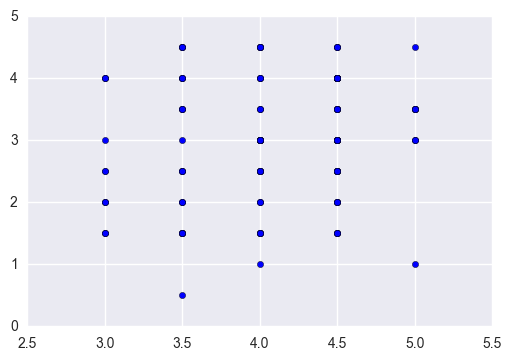

In [20]:
plt.scatter(movies["Fandango_Stars"], movies["Metacritic_norm_round"])
plt.show()

In [21]:
import numpy
movies["fm_diff"] = numpy.abs(movies["Metacritic_norm_round"] - movies["Fandango_Stars"])
movies.sort("fm_diff", ascending=False).head()

C:\Users\epfo\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


In [27]:
print(movies["fm_diff"].value_counts())
print("Total no of movies", movies.shape[0])

1.0    32
0.5    31
1.5    30
2.0    21
0.0    13
2.5    11
3.0     7
4.0     1
Name: fm_diff, dtype: int64
Total no of movies 146


40 movies from a sample of 146 have a difference of more than 2 in ratings from Meta Critic and Fandango. This is a fairly high number as the ratings are normalised out of 5. 

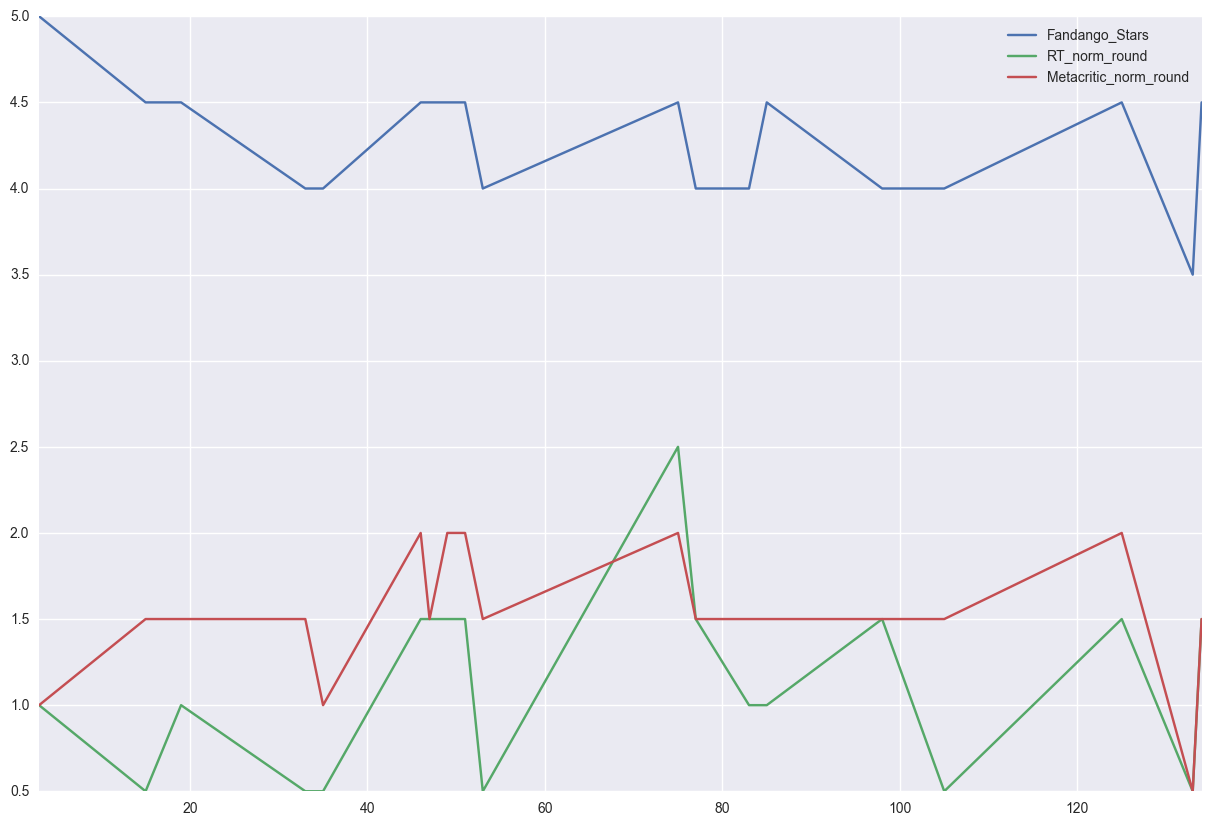

In [34]:
movies[["Fandango_Stars","RT_norm_round","Metacritic_norm_round"]][movies["fm_diff"]>2].plot(figsize=(15,10))
plt.show()

From the above graph for movies whose difference in ratings between Metacritic and Fandango is greater than 2. The Rotten Tomatoes and Metacritic Rating are nearer to each other. 

# Corelation

In [39]:
from scipy.stats import pearsonr

r,p_value = pearsonr(movies["Fandango_Stars"], movies["Metacritic_norm_round"])
print("pearson r index for Fandango and Metacritic", r)

r,p_value = pearsonr(movies["RT_norm_round"], movies["Metacritic_norm_round"])
print("pearson r index for Rotten Tomato and Metacritic", r)

r,p_value = pearsonr(movies["Fandango_Stars"], movies["RT_norm_round"])
print("pearson r index for Fandango and Rotten Tomato", r)

pearson r index for Fandango and Metacritic 0.178449190739
pearson r index for Rotten Tomato and Metacritic 0.946600201953
pearson r index for Fandango and Rotten Tomato 0.300427447123


From the scatter plot its evident that the R value will be less, near about zero. The corelation shouldnt be so less as while rating a movie the criteria are somewhat the same for a critic as well as a common user. The corelation between metacritic and RT is 0.94 whereas the corelation between Fandango and RT is 0.3 Its indicates there is a fundamental difference how fandango ratings are calculated.

# Predicting Fandango Rating from Metacritic Score

In [24]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(movies["Metacritic_norm_round"],movies["Fandango_Stars"])

In [25]:
meta_score = 3.0
prediction = slope*meta_score + intercept
print(prediction)

4.09170715282


For a metacritic rating of 3 the Fandango rating is predicted to be 4.09. This is similar to both of their mean values. 